In [24]:
import pandas as pd
xls = pd.ExcelFile('POS_Data_SM.xlsx')
# POS_Data = pd.read_excel(xls, 'POS Data')
Barcodes = pd.read_excel(xls, 'Barcodes')
POS_Data = pd.read_csv('POS_DATA_DATE.csv')
Categories_Hierarchy = pd.read_excel(xls, 'Categories Hierarchy')
joined_table = pd.merge(POS_Data,Barcodes, how='inner', on='Barcode')
# here we join all the tables
all_joined_table = pd.merge(joined_table,Categories_Hierarchy, how='inner', on=['CategoryA','CategoryB','CategoryC','CategoryD'])
# we clean some values
all_joined_table.drop(179817,axis=0,inplace=True)

# we groupby by CategoryC and aggregate its size in the column counts
all_joined_table_groupedby_categoryC = all_joined_table.groupby(["CategoryC"]).size().reset_index(name='counts')
# we sort descending by counts
sorted_categories = all_joined_table_groupedby_categoryC.sort_values(by="counts",ascending=False)
# sorted_categories
sorted_categories[:10]

,CategoryC,counts
68,183,22004
4,8,15093
112,261,12017
125,284,9007
42,110,7712
66,181,7407
126,285,5153
123,282,5105
101,229,5089
0,1,4837


In [25]:
# we get rid of data we do not need 
Categories_Hierarchy_dropped_catD = Categories_Hierarchy.drop(['CategoryD','CategoryDDescription'],axis=1)
Categories_Hierarchy_dropped_catD = Categories_Hierarchy_dropped_catD.groupby(['CategoryC','CategoryCDescription']).size()
Categories_Hierarchy_dropped_catD = Categories_Hierarchy_dropped_catD.to_frame().reset_index()
Categories_Hierarchy_dropped_catD.drop(0, axis=1, inplace=True)
# we merge with categories hierarchy table to get the description of each category
sorted_categories_with_description = pd.merge(sorted_categories,Categories_Hierarchy_dropped_catD,how='inner', on="CategoryC" )
sorted_categories_with_description
def size(x):
    x = int(x)
    return x/46190
sorted_categories_with_description['counts%'] = 'counts%'
# we calculate the percentage of counts for each category by diving the number of overall barcode data
sorted_categories_with_description['counts%'] = sorted_categories_with_description['counts'].map(size)
# we get the top 10
sorted_categories_with_description_top_10 = sorted_categories_with_description[:10]
sorted_categories_with_description_top_10

,CategoryC,counts,CategoryCDescription,counts%
0,183,22004,ΦΡΕΣΚΑ ΛΑΧΑΝΙΚΑ,0.476380
1,8,15093,ΓΑΛΑ ΦΡΕΣΚΟ,0.326759
2,261,12017,ΑΝΑΨΥΚΤΙΚΑ,0.260165
3,284,9007,ΧΑΡΤΙΚΑ,0.194999
4,110,7712,ΤΥΡΙΑ ΚΟΥΠ,0.166963
5,181,7407,ΦΡΕΣΚΑ ΦΡΟΥΤΑ,0.160359
6,285,5153,ΕΙΔΗ ΥΓΙΕΙΝΗΣ - ΚΑΛΛΥΝΤΙΚ,0.111561
7,282,5105,ΚΑΘΑΡΙΣΤΙΚΑ,0.110522
8,229,5089,ΤΣΙΠΣ/ΣΝΑΚΣ,0.110175
9,1,4837,ΓΙΑΟΥΡΤΙ,0.104720


In [26]:
# we calculate the sum_units for each C category
# we calculate the sum_units for each unique combinaton of basket_id and C category
basket_id_and_catC_sum_units = all_joined_table.groupby(['Basket_ID','CategoryC'])['Sum_Units'].sum().reset_index()
# basket_id_and_catC_sum_units

In [53]:
# we calculate the total sum of each basket_id
sum_units_per_basket_id = all_joined_table.groupby('Basket_ID')['Sum_Units'].sum().reset_index()
sum_units_per_basket_id.columns = ['Basket_ID', 'Basket_Sum']
sum_units_per_basket_id

,Basket_ID,Basket_Sum
0,1089674688,1.0
1,1089674689,6.0
2,1089674690,2.0
3,1089674691,11.0
4,1089674692,2.0
5,1089674702,12.0
6,1089674703,7.0
7,1089674704,21.0
8,1089674705,1.0
9,1089674706,2.0


In [28]:
# we join the tables with the total basket unit sum and the table with
# each category and basket_id sum combination
sumUnits_df_merged = pd.merge(basket_id_and_catC_sum_units,sum_units_per_basket_id,how='inner',on="Basket_ID")
sumUnits_df = sumUnits_df_merged
sumUnits_df['sum%'] = 'sum%'
sumUnits_df
# to calculate the percentage of each C category item of the total sum of each basket we
# divide the sum_units of the C category and basket_id combination with the total basket_id sum
sumUnits_df['sum%'] = sumUnits_df['Sum_Units'] / sumUnits_df['Basket_Sum']
sumUnits_df
# we groupby by each C category and calculate the mean for each sum% of each C category
sumUnits_df = sumUnits_df.groupby(['CategoryC'])['sum%'].mean().reset_index()
sumUnits_df.columns = ['CategoryC', 'Average % unit per basket']
# sumUnits_df.sort_values('Average % unit per basket',ascending=False)


In [29]:
# here we calculate the average unit for each C category per basket
average_pCategory = sumUnits_df_merged.groupby(['CategoryC'])['Sum_Units'].mean().reset_index()
average_pCategory.columns = ['CategoryC', 'Average unit per basket']
# average_pCategory.sort_values('Average unit per basket',ascending=False)


In [55]:
# here we calculate the sum value for each combination of basket_id and C category
sum_value_combo = all_joined_table.groupby(['Basket_ID','CategoryC'])['Sum_Value'].sum().reset_index()
# sum_value_combo

In [52]:
# total sum value for each basket_id
sum_units_pBasket = all_joined_table.groupby('Basket_ID')['Sum_Value'].sum().reset_index()
sum_units_pBasket.columns = ['Basket_ID', 'Basket_Sum_Value']
sum_units_pBasket

,Basket_ID,Basket_Sum_Value
0,1089674688,1.640000
1,1089674689,3.590022
2,1089674690,3.000000
3,1089674691,9.050242
4,1089674692,3.380015
5,1089674702,14.380015
6,1089674703,6.930007
7,1089674704,33.319766
8,1089674705,3.469494
9,1089674706,3.240000


In [56]:
# we join the tables for the total sum for each basket and the table with the sum value
# per each combination of basket_id and C category
sum_value_total_merged = pd.merge(sum_value_combo,sum_units_pBasket,how='inner',on="Basket_ID")
sum_value_total = sum_value_total_merged
sum_value_total['sum%'] = 'sum%'
sum_value_total['sum%'] = sum_value_total['Sum_Value'] / sum_value_total['Basket_Sum_Value']
# we groupby by each C category and calculate the mean for each sum% of each C category
sum_value_total = sum_value_total.groupby(['CategoryC'])['sum%'].mean().reset_index()
sum_value_total.columns = ['CategoryC', 'Average % value per basket']
sum_value_total
# sum_value_total.sort_values('Average % value per basket',ascending=False)
# sum_value_total

,CategoryC,Average % value per basket
0,1,0.240015
1,2,0.212610
2,3,0.226016
3,6,0.258198
4,8,0.305245
5,10,0.301225
6,11,0.207580
7,15,0.191145
8,16,0.223367
9,17,0.156697


In [50]:
# here we calculate the average value for each C category per basket
sum_value_total_merged
average_value_pCategory = sum_value_total_merged.groupby(['CategoryC'])['Sum_Value'].mean().reset_index()
average_value_pCategory.columns = ['CategoryC', 'Average value per basket']
# average_value_pCategory.sort_values('Average value per basket',ascending=False)


In [39]:
# we join all the above tables into one
table_merged_with_average = pd.merge(sorted_categories_with_description_top_10,sumUnits_df,how='inner',on="CategoryC")
table_merged_with_average = pd.merge(table_merged_with_average,average_pCategory,how='inner',on="CategoryC")
table_merged_with_average = pd.merge(table_merged_with_average,sum_value_total,how='inner',on="CategoryC")
table_merged_with_average = pd.merge(table_merged_with_average,average_value_pCategory,how='inner',on="CategoryC")


,CategoryC,counts,CategoryCDescription,counts%,Average % unit per basket,Average unit per basket,Average % value per basket,Average value per basket
0,183,22004,ΦΡΕΣΚΑ ΛΑΧΑΝΙΚΑ,0.476380,0.318247,2.066829,0.254443,2.438794
1,8,15093,ΓΑΛΑ ΦΡΕΣΚΟ,0.326759,0.337635,1.956428,0.305245,2.432902
2,261,12017,ΑΝΑΨΥΚΤΙΚΑ,0.260165,0.292588,1.912905,0.249124,2.209298
3,284,9007,ΧΑΡΤΙΚΑ,0.194999,0.280084,1.605513,0.332863,4.416119
4,110,7712,ΤΥΡΙΑ ΚΟΥΠ,0.166963,0.208619,1.279219,0.308582,4.611457
5,181,7407,ΦΡΕΣΚΑ ΦΡΟΥΤΑ,0.160359,0.238085,1.336459,0.242320,2.327444
6,285,5153,ΕΙΔΗ ΥΓΙΕΙΝΗΣ - ΚΑΛΛΥΝΤΙΚ,0.111561,0.243774,1.494358,0.271957,3.657612
7,282,5105,ΚΑΘΑΡΙΣΤΙΚΑ,0.110522,0.221191,1.494029,0.224000,2.782361
8,229,5089,ΤΣΙΠΣ/ΣΝΑΚΣ,0.110175,0.266871,1.659570,0.225315,1.616390
9,1,4837,ΓΙΑΟΥΡΤΙ,0.104720,0.223814,1.396330,0.240015,2.620653


In [71]:
import matplotlib.pyplot as plt
# here we calculate the daily sales per category
categories_dates = all_joined_table.groupby(['Date','CategoryC'])['Sum_Value'].sum().reset_index(name='day_sales')
categories_dates
# we join the above tables
daysales = pd.merge(categories_dates,sorted_categories_with_description_top_10,how="right",on="CategoryC")
# here we extract the daily sales for each C category
daysales1 = daysales[daysales.CategoryC==1]
daysales183 = daysales[daysales.CategoryC==183]
daysales8 = daysales[daysales.CategoryC==8]
daysales261 = daysales[daysales.CategoryC==261]
daysales284 = daysales[daysales.CategoryC==284]
daysales110 = daysales[daysales.CategoryC==110]
daysales181 = daysales[daysales.CategoryC==181]
daysales285 = daysales[daysales.CategoryC==285]
daysales282 = daysales[daysales.CategoryC==282]
daysales229 = daysales[daysales.CategoryC==229]
# daysales229
# fig, ax = plt.subplots()
# fig.autofmt_xdate()
# fig.set_size_inches(25.5, 20.5, forward=True)
# # we then plot a graph with the daily sales data for each C category
# a = plt.plot(daysales1.Date,daysales1.day_sales, label='ΓΙΑΟΥΡΤΙ')
# b = plt.plot(daysales1.Date,daysales183.day_sales, label='ΦΡΕΣΚΑ ΛΑΧΑΝΙΚΑ')
# c = plt.plot(daysales1.Date,daysales8.day_sales, label='ΓΑΛΑ ΦΡΕΣΚΟ')
# d = plt.plot(daysales1.Date,daysales261.day_sales, label='ΑΝΑΨΥΚΤΙΚΑ')
# e = plt.plot(daysales1.Date,daysales261.day_sales, label='ΧΑΡΤΙΚΑ')
# f = plt.plot(daysales1.Date,daysales110.day_sales, label='ΤΥΡΙΑ ΚΟΥΠ')
# g = plt.plot(daysales1.Date,daysales181.day_sales, label='ΦΡΕΣΚΑ ΦΡΟΥΤΑ')
# h = plt.plot(daysales1.Date,daysales285.day_sales, label='ΕΙΔΗ ΥΓΙΕΙΝΗΣ - ΚΑΛΛΥΝΤΙΚ')
# i = plt.plot(daysales1.Date,daysales282.day_sales, label='ΚΑΘΑΡΙΣΤΙΚΑ')
# j = plt.plot(daysales1.Date,daysales229.day_sales, label='ΤΣΙΠΣ/ΣΝΑΚΣ')

# plt.xlabel('Days')
# plt.ylabel('Sales')
# fig.legend()

# plt.show()

In [72]:
# here we insert a column that we will fill later
table_merged_with_average['Average Sales/Day'] = 'Sale'
# we fill the Average Sales column with the mean daily sales of each category
table_merged_with_average.loc[table_merged_with_average['CategoryC'] == 1,['Average Sales/Day']] = daysales1['day_sales'].mean()
table_merged_with_average.loc[table_merged_with_average['CategoryC'] == 183,['Average Sales/Day']] = daysales183['day_sales'].mean()
table_merged_with_average.loc[table_merged_with_average['CategoryC'] == 8,['Average Sales/Day']] = daysales8['day_sales'].mean()
table_merged_with_average.loc[table_merged_with_average['CategoryC'] == 261,['Average Sales/Day']] = daysales261['day_sales'].mean()
table_merged_with_average.loc[table_merged_with_average['CategoryC'] == 284,['Average Sales/Day']] = daysales284['day_sales'].mean()
table_merged_with_average.loc[table_merged_with_average['CategoryC'] == 110,['Average Sales/Day']] = daysales110['day_sales'].mean()
table_merged_with_average.loc[table_merged_with_average['CategoryC'] == 181,['Average Sales/Day']] = daysales181['day_sales'].mean()
table_merged_with_average.loc[table_merged_with_average['CategoryC'] == 285,['Average Sales/Day']] = daysales285['day_sales'].mean()
table_merged_with_average.loc[table_merged_with_average['CategoryC'] == 282,['Average Sales/Day']] = daysales282['day_sales'].mean()
table_merged_with_average.loc[table_merged_with_average['CategoryC'] == 229,['Average Sales/Day']] = daysales229['day_sales'].mean()
table_merged_with_average
# table_merged_with_average

,CategoryC,counts,CategoryCDescription,counts%,Average % unit per basket,Average unit per basket,Average % value per basket,Average value per basket,Average Sales,Average Sales/Day
0,183,22004,ΦΡΕΣΚΑ ΛΑΧΑΝΙΚΑ,0.476380,0.318247,2.066829,0.254443,2.438794,458.417,605.329
1,8,15093,ΓΑΛΑ ΦΡΕΣΚΟ,0.326759,0.337635,1.956428,0.305245,2.432902,314.438,637.927
2,261,12017,ΑΝΑΨΥΚΤΙΚΑ,0.260165,0.292588,1.912905,0.249124,2.209298,250.354,399.1
3,284,9007,ΧΑΡΤΙΚΑ,0.194999,0.280084,1.605513,0.332863,4.416119,187.646,647.513
4,110,7712,ΤΥΡΙΑ ΚΟΥΠ,0.166963,0.208619,1.279219,0.308582,4.611457,160.667,578.354
5,181,7407,ΦΡΕΣΚΑ ΦΡΟΥΤΑ,0.160359,0.238085,1.336459,0.242320,2.327444,154.312,271.971
6,285,5153,ΕΙΔΗ ΥΓΙΕΙΝΗΣ - ΚΑΛΛΥΝΤΙΚ,0.111561,0.243774,1.494358,0.271957,3.657612,107.354,294.438
7,282,5105,ΚΑΘΑΡΙΣΤΙΚΑ,0.110522,0.221191,1.494029,0.224000,2.782361,106.354,215.517
8,229,5089,ΤΣΙΠΣ/ΣΝΑΚΣ,0.110175,0.266871,1.659570,0.225315,1.616390,106.021,128.436
9,1,4837,ΓΙΑΟΥΡΤΙ,0.104720,0.223814,1.396330,0.240015,2.620653,100.771,238.043


ΦΡΕΣΚΑ ΛΑΧΑΝΙΚΑ


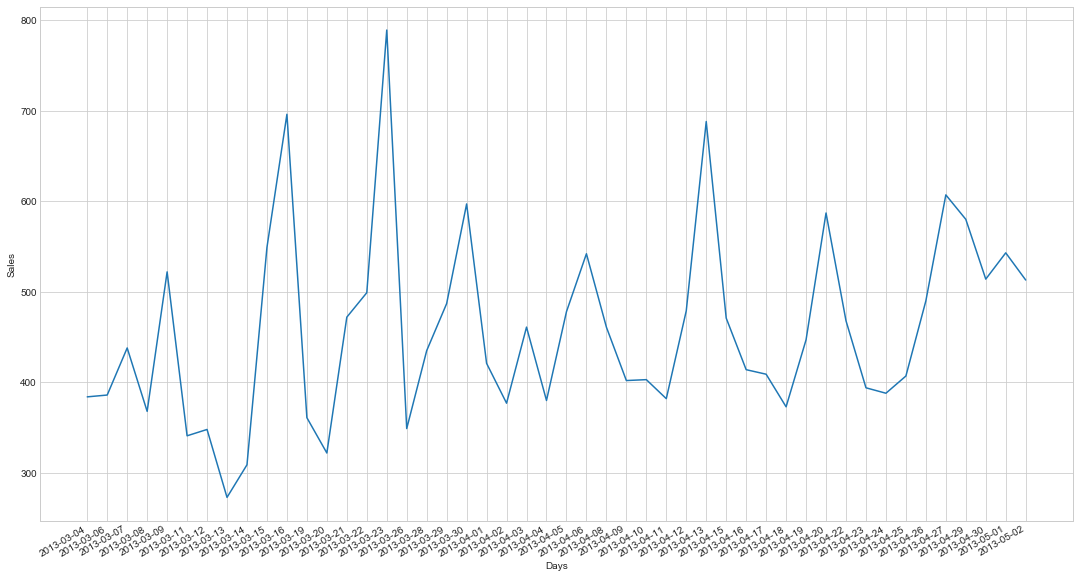

In [145]:
# TO BE DELETED
daysales1 = daysales[daysales.CategoryC==183]
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.plot(daysales1.Date,daysales1.day_sales)
print('ΦΡΕΣΚΑ ΛΑΧΑΝΙΚΑ')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

In [ ]:
# TO BE DELETED
daysales1 = daysales[daysales.CategoryC==183]
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.plot(daysales1.Date,daysales1.day_sales)
print('ΦΡΕΣΚΑ ΛΑΧΑΝΙΚΑ')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()